In [1]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_excel('/Users/shalikanuwan/Documents/Academics/FYP/ForecastingModelDevelopment/SolarForecasting/Data/filterdSolarGenerationUOM.xlsx')

In [4]:
data = data.dropna()

In [5]:
data

,Unnamed: 0,timestamp,temp,humidity,windgust,cloudcover,visibility,solarradiation,conditions,solarenergy,Solar_Generation,Adjusted_Generation
0,0,2022-04-01 00:00:00,26.1,88.76,9.7,30.0,10.0,0.0,Partially cloudy,0.0,0.000000,0.000000
1,1,2022-04-01 01:00:00,26.1,83.57,10.8,30.0,10.0,0.0,Partially cloudy,0.0,0.000000,0.000000
2,2,2022-04-01 02:00:00,25.7,86.52,11.9,61.9,18.1,0.0,Partially cloudy,0.0,0.000000,0.000000
3,3,2022-04-01 03:00:00,26.1,88.76,13.7,50.0,10.0,0.0,Partially cloudy,0.0,0.000000,0.000000
4,4,2022-04-01 04:00:00,26.1,88.76,14.8,30.0,10.0,0.0,Partially cloudy,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
26123,26323,2025-04-01 19:00:00,29.6,67.09,8.2,50.0,10.0,25.4,Partially cloudy,0.1,1.666668,0.935114
26124,26324,2025-04-01 20:00:00,30.4,70.14,6.7,88.4,12.9,0.0,Partially cloudy,0.0,0.000000,0.000000
26125,26325,2025-04-01 21:00:00,29.5,67.45,7.8,50.0,10.0,0.0,Partially cloudy,0.0,0.000000,0.000000
26126,26326,2025-04-01 22:00:00,29.0,70.49,5.7,90.0,10.0,0.0,Partially cloudy,0.0,0.000000,0.000000


In [6]:
data = data.drop('Unnamed: 0',axis=1)

Text(0.5, 1.0, 'Correlation Heatmap')

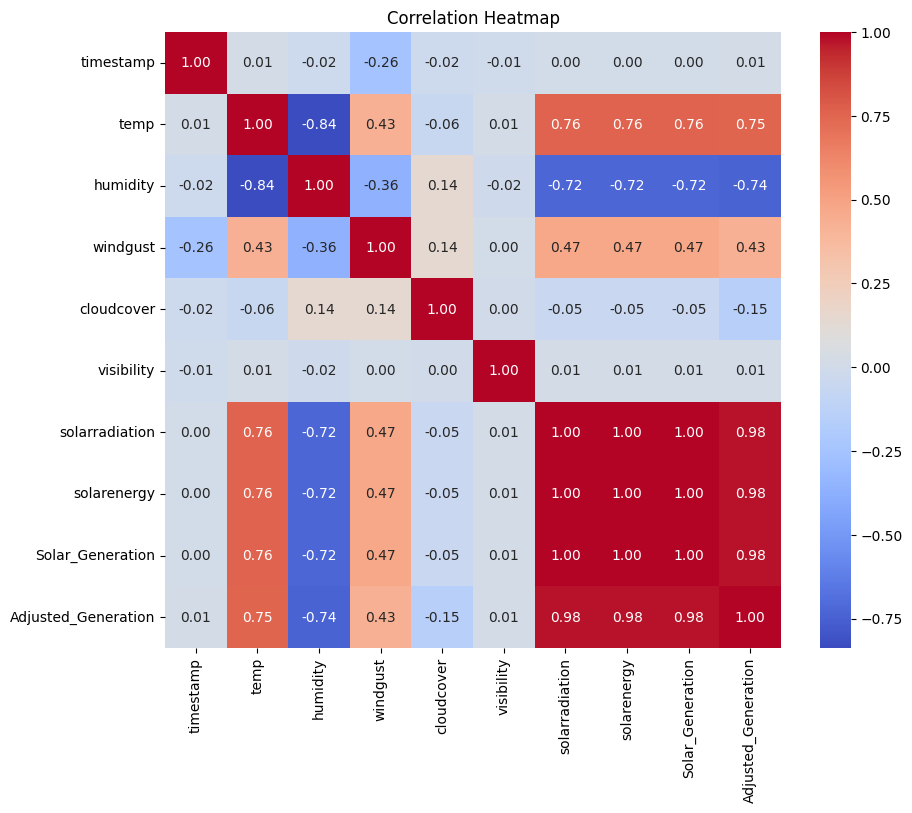

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = data.drop('conditions',axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")

In [8]:
data['Solar_Generation'].max()

61.66671600000001

In [9]:
for types in data['conditions'].unique():
    print(f'-------- data distribution of {types} day')
    temp_df = data[data['conditions'] == types]
    print(temp_df.describe())

-------- data distribution of Partially cloudy day
                           timestamp          temp      humidity  \
count                          19799  19799.000000  19799.000000   
mean   2023-10-14 06:33:00.827314432     28.325072     80.091157   
min              2022-04-01 00:00:00     21.100000     27.810000   
25%              2023-01-15 17:00:00     26.100000     70.670000   
50%              2023-10-25 12:00:00     28.100000     79.350000   
75%              2024-07-15 01:30:00     30.100000     88.880000   
max              2025-04-01 23:00:00     37.100000    100.000000   
std                              NaN      2.507098     11.868915   

           windgust    cloudcover    visibility  solarradiation   solarenergy  \
count  19799.000000  19799.000000  19799.000000    19799.000000  19799.000000   
mean      19.059897     52.824501     10.628330      223.724461      0.804505   
min        0.400000     20.100000      1.000000        0.000000      0.000000   
25%       11

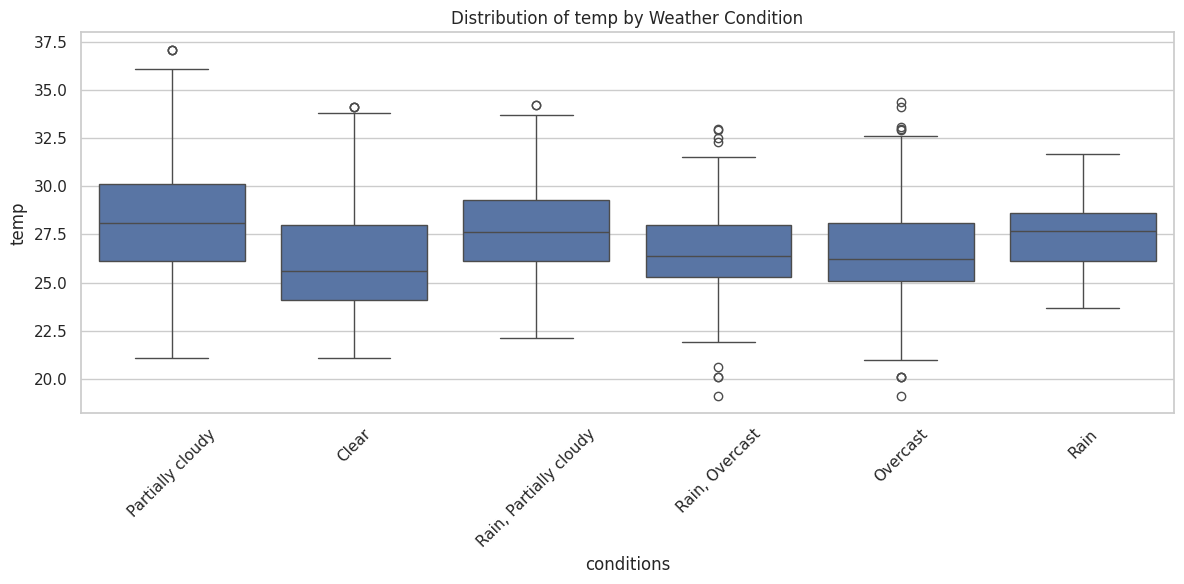

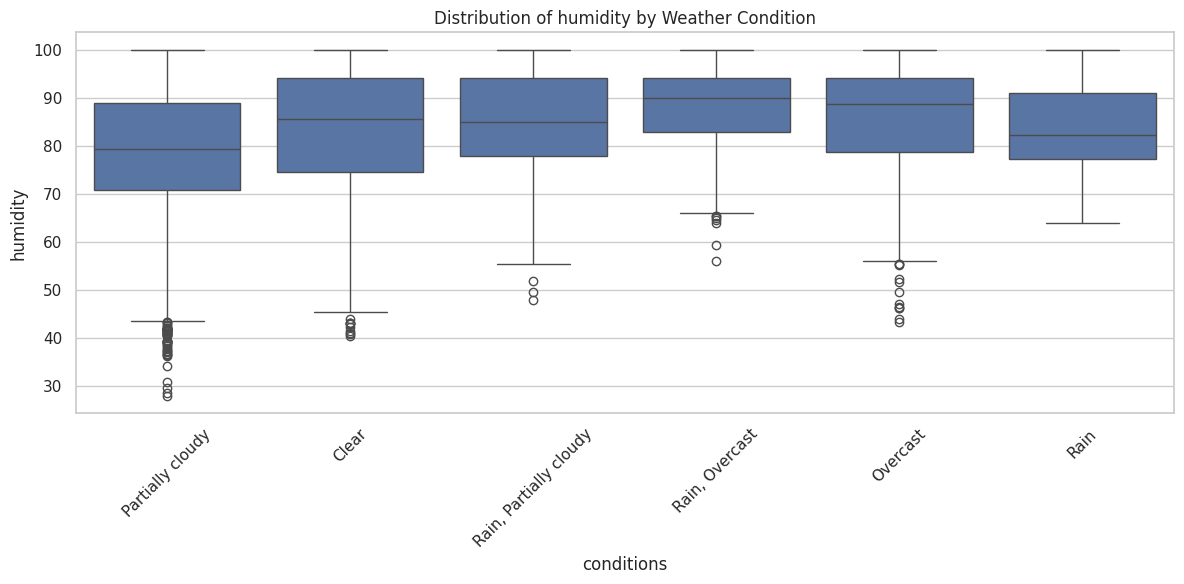

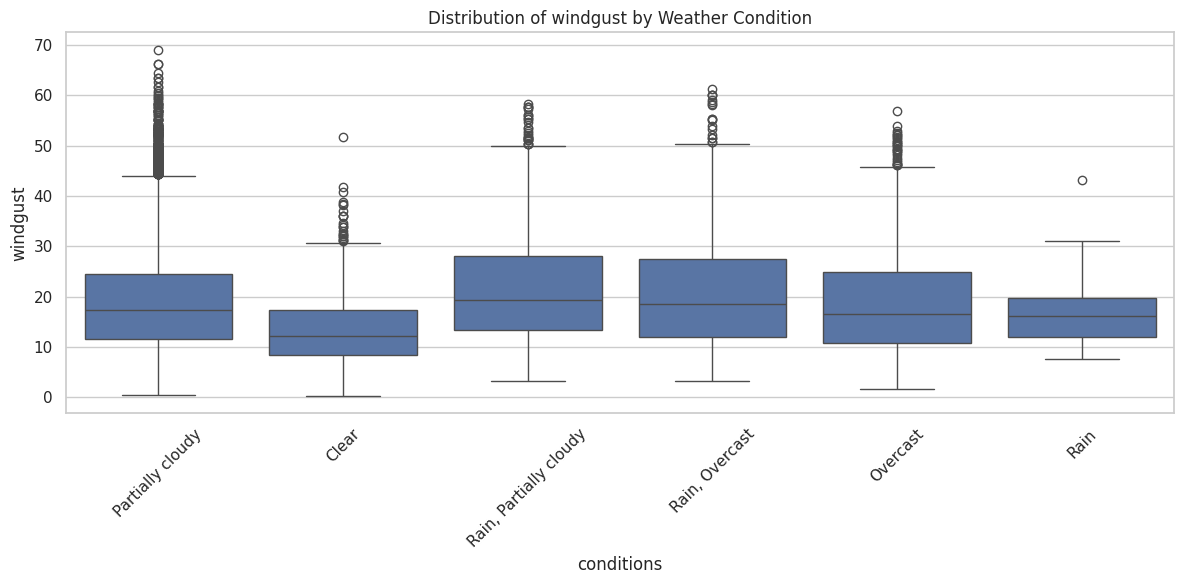

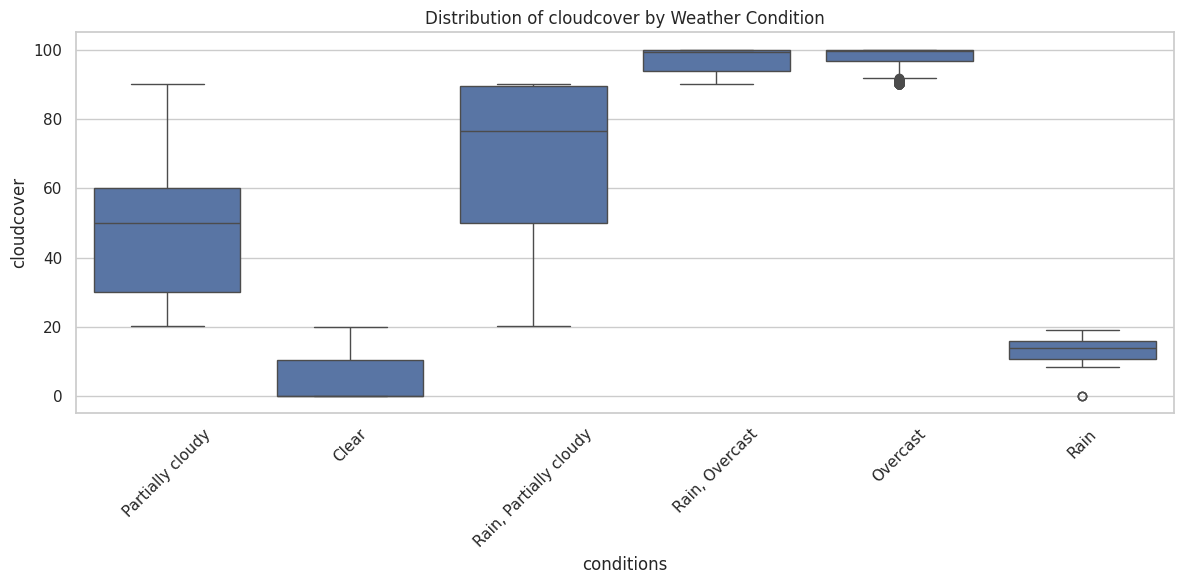

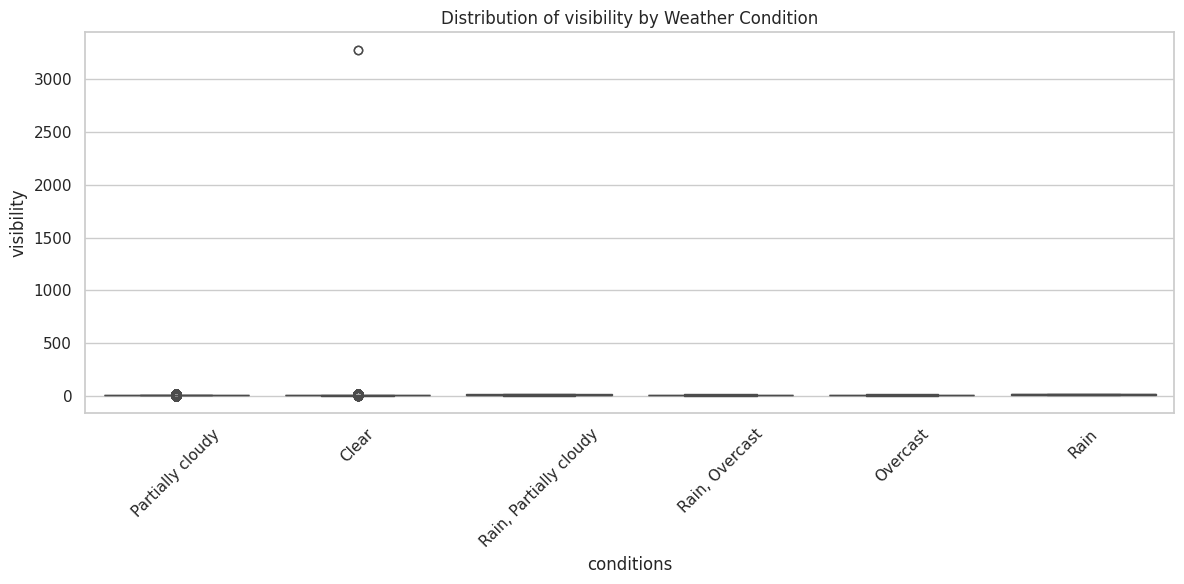

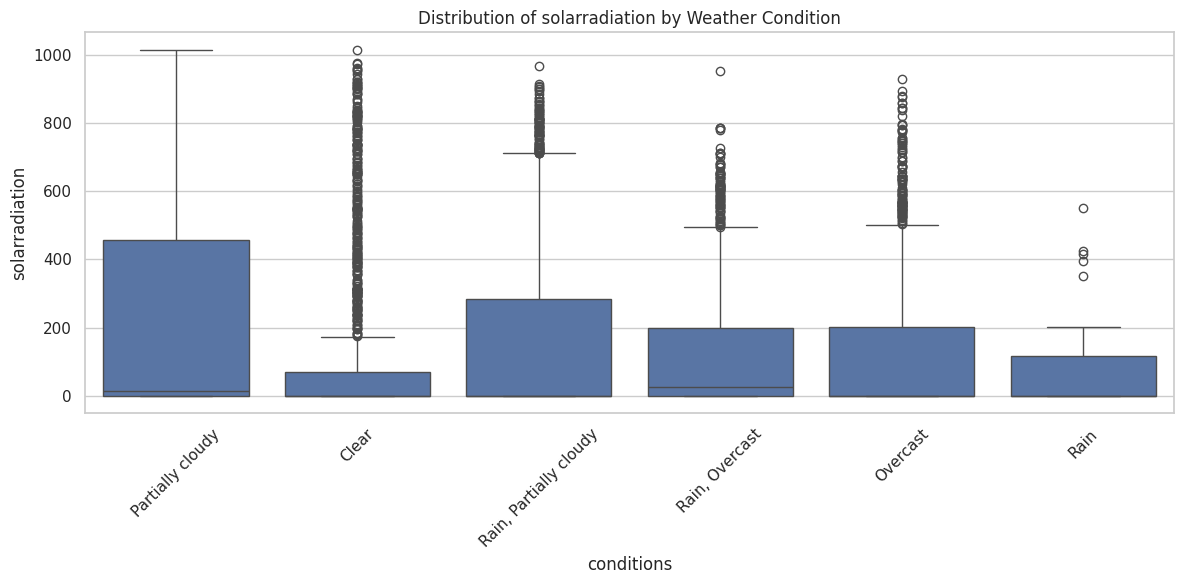

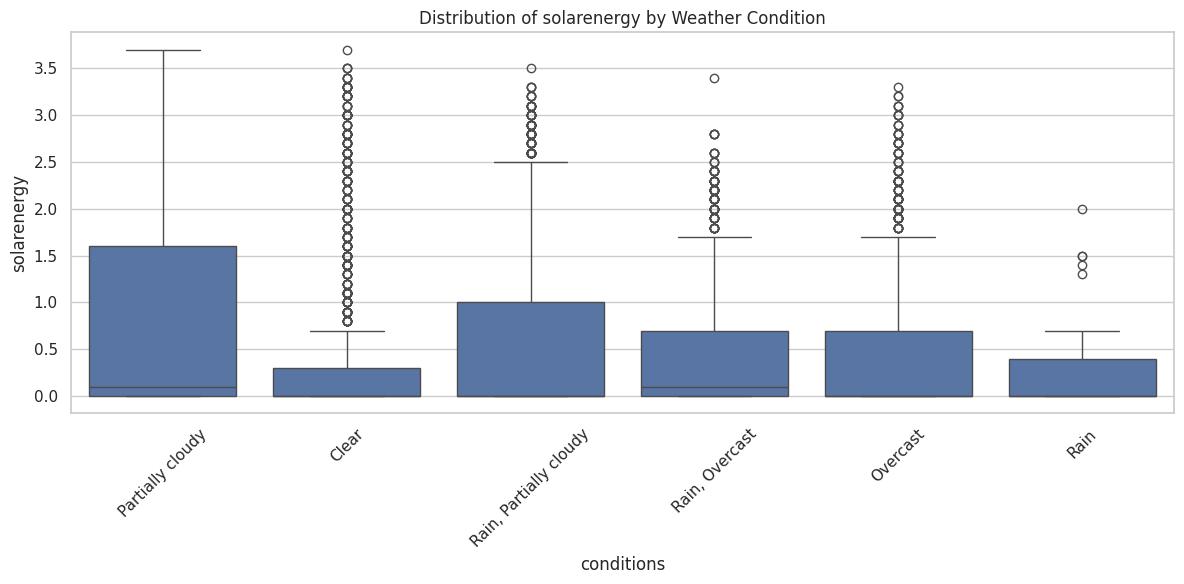

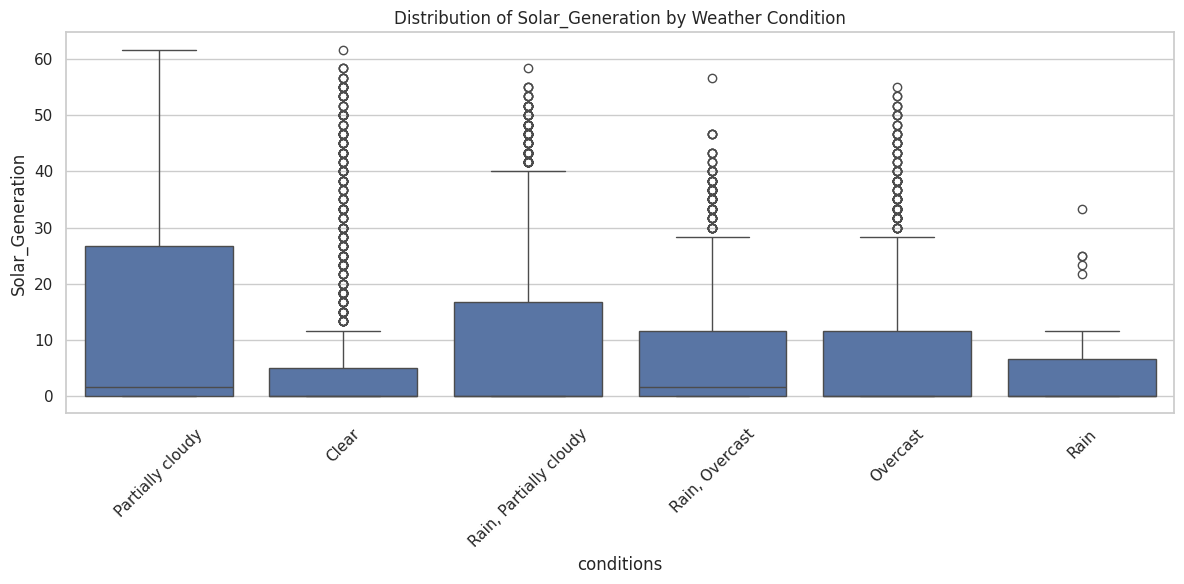

In [10]:
variables_to_plot = ['temp', 'humidity', 'windgust', 'cloudcover',
                     'visibility', 'solarradiation', 'solarenergy', 'Solar_Generation']

sns.set(style="whitegrid")

for var in variables_to_plot:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='conditions', y=var, data=data)
    plt.title(f'Distribution of {var} by Weather Condition')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [11]:
data['month'] = data['timestamp'].dt.month
data['day'] = data['timestamp'].dt.day
data['day_of_week'] = data['timestamp'].dt.day_of_week
data['day_of_year'] = data['timestamp'].dt.day_of_year

In [12]:
data['Solar_Generation'].max(),data['Solar_Generation'].min()

(61.66671600000001, 0.0)

In [13]:
data['temp'].max(),data['temp'].min()

(37.1, 19.1)

In [14]:
data['humidity'].max(),data['humidity'].min()

(100.0, 27.81)

In [15]:
data['windgust'].max(),data['windgust'].min()

(69.1, 0.2)

In [16]:
data['solarradiation'].max(), data['solarradiation'].min()

(1014.2, 0.0)

In [6]:
from sklearn.preprocessing import MinMaxScaler

genScaler = MinMaxScaler()
tempScaler = MinMaxScaler()
humScaler = MinMaxScaler()
windgustScaler = MinMaxScaler()
irrScaler = MinMaxScaler()

In [7]:
data['Adjusted_Generation'] = genScaler.fit_transform(data[['Adjusted_Generation']])

Without scaling other parameters

In [9]:
import pickle
with open('genScalerRF.pkl', 'wb') as f:
    pickle.dump(genScaler, f)

In [10]:
data.columns

Index(['Unnamed: 0', 'timestamp', 'temp', 'humidity', 'windgust', 'cloudcover',
       'visibility', 'solarradiation', 'conditions', 'solarenergy',
       'Solar_Generation', 'Adjusted_Generation'],
      dtype='object')

In [11]:
x = data[['temp','humidity','windgust','solarradiation']]
y = data['Adjusted_Generation']

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,mean_absolute_percentage_error

# Initialize models
rf_model = RandomForestRegressor(n_estimators=100)
# Fit models
rf_model.fit(x_train, y_train)

RandomForestRegressor()

In [23]:
rf_preds = rf_model.predict(x_test)

In [24]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(genScaler.inverse_transform([y_true]).flatten(), genScaler.inverse_transform([y_pred]).flatten())
    mse = mean_squared_error(genScaler.inverse_transform([y_true]).flatten(), genScaler.inverse_transform([y_pred]).flatten())
    mape = mean_absolute_percentage_error(genScaler.inverse_transform([y_true]).flatten(), genScaler.inverse_transform([y_pred]).flatten())
    r2 = r2_score(genScaler.inverse_transform([y_true]).flatten(), genScaler.inverse_transform([y_pred]).flatten())
    print(f"Evaluation Metrics for {model_name}:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"MAPE: {mape}")
    print(f"R² Score: {r2}")
    print("-" * 50)

evaluate_model(y_test.values, rf_preds, "Random Forest")

Evaluation Metrics for Random Forest:
MAE: 0.9791536101909666
MSE: 4.445834153252431
MAPE: 33715895573.578297
R² Score: 0.9617471788053095
--------------------------------------------------


[]

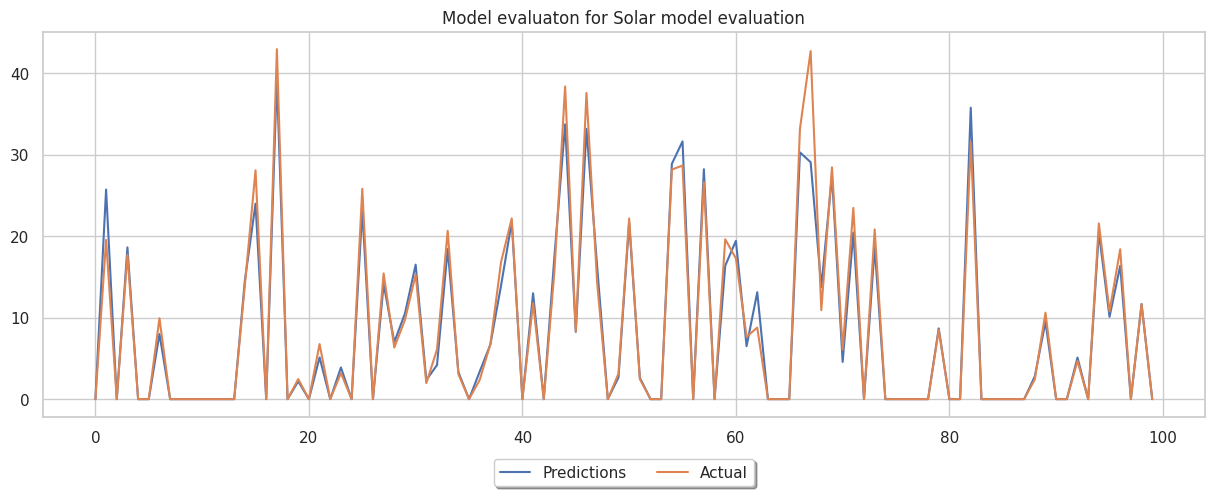

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(genScaler.inverse_transform([rf_preds]).flatten()[300:400],label = 'Predictions')
plt.plot(genScaler.inverse_transform([y_test]).flatten()[300:400],label = 'Actual')
plt.title('Model evaluaton for Solar model evaluation')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=2)
plt.plot()

In [26]:
data

,timestamp,temp,humidity,windgust,cloudcover,visibility,solarradiation,conditions,solarenergy,Solar_Generation,Adjusted_Generation,month,day,day_of_week,day_of_year
0,2022-04-01 00:00:00,26.1,88.76,9.7,30.0,10.0,0.0,Partially cloudy,0.0,0.000000,0.000000,4,1,4,91
1,2022-04-01 01:00:00,26.1,83.57,10.8,30.0,10.0,0.0,Partially cloudy,0.0,0.000000,0.000000,4,1,4,91
2,2022-04-01 02:00:00,25.7,86.52,11.9,61.9,18.1,0.0,Partially cloudy,0.0,0.000000,0.000000,4,1,4,91
3,2022-04-01 03:00:00,26.1,88.76,13.7,50.0,10.0,0.0,Partially cloudy,0.0,0.000000,0.000000,4,1,4,91
4,2022-04-01 04:00:00,26.1,88.76,14.8,30.0,10.0,0.0,Partially cloudy,0.0,0.000000,0.000000,4,1,4,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26123,2025-04-01 19:00:00,29.6,67.09,8.2,50.0,10.0,25.4,Partially cloudy,0.1,1.666668,0.016234,4,1,1,91
26124,2025-04-01 20:00:00,30.4,70.14,6.7,88.4,12.9,0.0,Partially cloudy,0.0,0.000000,0.000000,4,1,1,91
26125,2025-04-01 21:00:00,29.5,67.45,7.8,50.0,10.0,0.0,Partially cloudy,0.0,0.000000,0.000000,4,1,1,91
26126,2025-04-01 22:00:00,29.0,70.49,5.7,90.0,10.0,0.0,Partially cloudy,0.0,0.000000,0.000000,4,1,1,91


In [13]:
# prompt: do the label encoding for the conditions dataframe

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'conditions' column
data['conditions_encoded'] = label_encoder.fit_transform(data['conditions'])

# Display the mapping between original labels and encoded values
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


{'Clear': 0, 'Overcast': 1, 'Partially cloudy': 2, 'Rain': 3, 'Rain, Overcast': 4, 'Rain, Partially cloudy': 5}


In [ ]:
label_encoder.transform

In [14]:
with open('label_encoder_weather_condition.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

In [18]:
data.set_index('timestamp',inplace=True)

In [22]:
data.index.day_of_year

Index([91, 91, 91, 91, 91, 91, 91, 91, 91, 91,
       ...
       91, 91, 91, 91, 91, 91, 91, 91, 91, 91],
      dtype='int32', name='timestamp', length=26128)

In [15]:
x = data[['temp','humidity','windgust','solarradiation','conditions_encoded','month','day','day_of_week','day_of_year']]
y = data['Adjusted_Generation']

KeyError: "['month', 'day', 'day_of_week', 'day_of_year'] not in index"

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,mean_absolute_percentage_error

# Initialize models
rf_model = RandomForestRegressor(n_estimators=100)
# Fit models
rf_model.fit(x_train, y_train)

RandomForestRegressor()

In [32]:
rf_preds = rf_model.predict(x_test)


In [35]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(genScaler.inverse_transform([y_true]).flatten(), genScaler.inverse_transform([y_pred]).flatten())
    mse = mean_squared_error(genScaler.inverse_transform([y_true]).flatten(), genScaler.inverse_transform([y_pred]).flatten())
    mape = mean_absolute_percentage_error(genScaler.inverse_transform([y_true]).flatten(), genScaler.inverse_transform([y_pred]).flatten())
    r2 = r2_score(genScaler.inverse_transform([y_true]).flatten(), genScaler.inverse_transform([y_pred]).flatten())
    print(f"Evaluation Metrics for {model_name}:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"MAPE: {mape}")
    print(f"R² Score: {r2}")
    print("-" * 50)

evaluate_model(y_test.values, rf_preds, "Random Forest")

Evaluation Metrics for Random Forest:
MAE: 0.8563171706842749
MSE: 3.170857770470347
MAPE: 0.05713456148870126
R² Score: 0.972281190903661
--------------------------------------------------


[]

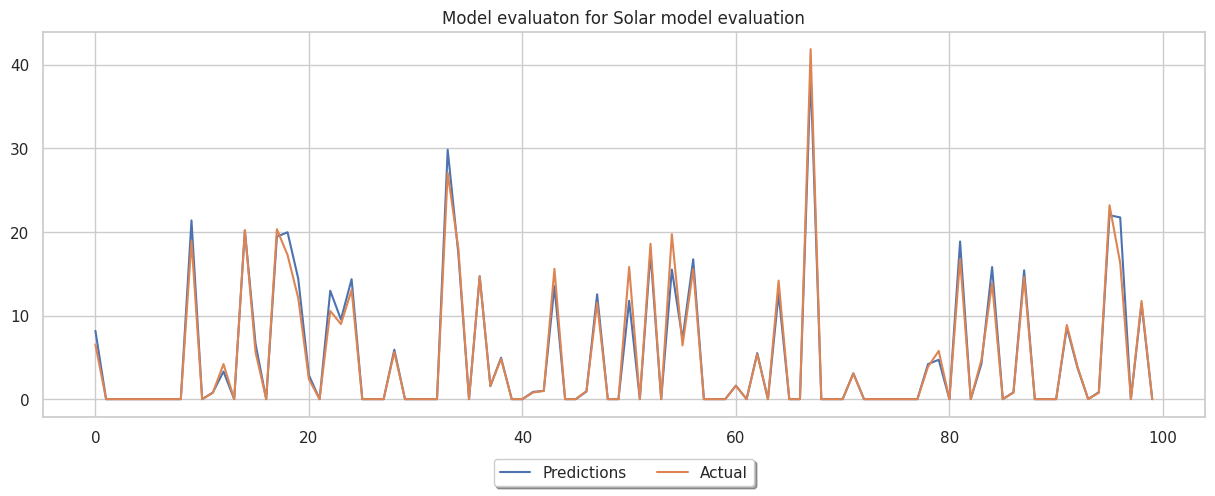

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(genScaler.inverse_transform([rf_preds]).flatten()[300:400],label = 'Predictions')
plt.plot(genScaler.inverse_transform([y_test]).flatten()[300:400],label = 'Actual')
plt.title('Model evaluaton for Solar model evaluation')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=2)
plt.plot()

In [37]:
import pickle

# Save the model to a file
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [38]:
rf_preds

array([0.67551277, 0.        , 0.26264344, ..., 0.        , 0.        ,
       0.        ])

In [39]:
y_test

,Adjusted_Generation
25710,0.578210
2375,0.000000
2595,0.268584
21719,0.000000
4001,0.000000
...,...
4860,0.000000
20032,0.000000
2138,0.000000
24190,0.000000


In [42]:
len(data)*0.2


5225.6

In [44]:
test_data = data.tail(5226)

In [45]:
x = test_data[['temp','humidity','windgust','solarradiation','conditions_encoded','month','day','day_of_week','day_of_year']]
y = test_data['Adjusted_Generation']

In [48]:
test_pred = rf_model.predict(x)

In [49]:
test_pred = genScaler.inverse_transform([test_pred]).flatten()

In [53]:
x

,temp,humidity,windgust,solarradiation,conditions_encoded,month,day,day_of_week,day_of_year
20902,28.0,78.35,9.1,0.0,2,8,27,1,240
20903,29.0,73.63,9.3,5.4,2,8,27,1,240
20904,29.9,69.82,17.3,123.6,2,8,27,1,240
20905,30.9,66.02,18.6,331.5,2,8,27,1,240
20906,31.0,65.58,15.8,532.3,2,8,27,1,240
...,...,...,...,...,...,...,...,...,...
26123,29.6,67.09,8.2,25.4,2,4,1,1,91
26124,30.4,70.14,6.7,0.0,2,4,1,1,91
26125,29.5,67.45,7.8,0.0,2,4,1,1,91
26126,29.0,70.49,5.7,0.0,2,4,1,1,91


In [ ]:
import pandas as pd

y_test_inversed = genScaler.inverse_transform([y]).flatten()
df_results = pd.DataFrame({'Predicted_Generation': test_pred, 'Actual_Generation': y_test_inversed})

df_results


,Predicted_Generation,Actual_Generation
0,0.000000,0.000000
1,0.000000,0.000000
2,3.651652,3.500873
3,11.941597,11.757605
4,19.268991,18.373552
...,...,...
5221,0.993982,0.935114
5222,0.000000,0.000000
5223,0.000000,0.000000
5224,0.000000,0.000000


In [58]:
df_results.to_excel('results.xlsx')

In [60]:
evaluate_model(df_results['Actual_Generation'].values, df_results['Predicted_Generation'].values, "Random Forest")

Evaluation Metrics for Random Forest:
MAE: 25.982168735546836
MSE: 3490.1591414438267
MAPE: 0.029335758165044305
R² Score: 0.9914688887741804
--------------------------------------------------


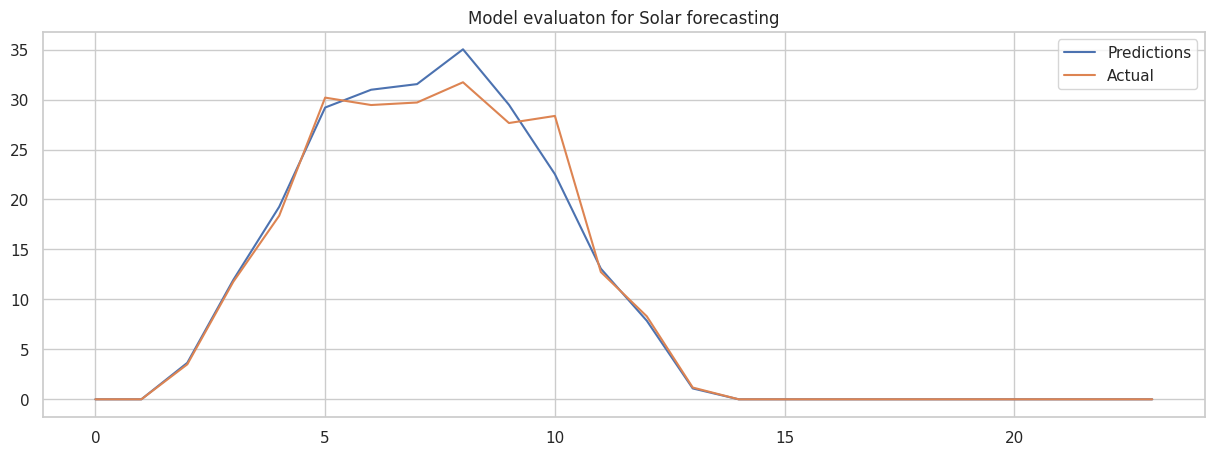

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(df_results['Predicted_Generation'].values[:24],label = 'Predictions')
plt.plot(df_results['Actual_Generation'].values[:24],label = 'Actual')
plt.title('Model evaluaton for Solar forecasting')
plt.legend()